In [97]:
import numpy as np
from utils import draw_boxes, unbox
import json
from PIL import Image, ImageFont, ImageDraw
from PID import PID
import glob

## Preprocessing
We store some images from the thymio so we can use them to locally test the logic behind the code that we will run on the thymio

In [212]:
images_path = glob.glob('./image_save/*.npy')
datas_path = glob.glob('./image_save/*.json')
paths = list(zip(images_path, datas_path))

In [213]:
TARGET = 'person'

In [234]:
def load_from_path(paths):
    img_path, data_path = paths
    img = np.load(img_path)
    data = json.load(open(data_path, 'r'))
    target_data = list(filter(lambda x: x['class'] == target, data['res']))[0]
    
    return img ,target_data

In [235]:
dataset = list(map(load_from_path, paths))

In [236]:
width, height, colors = dataset[0][0].shape

In [237]:
print("image size: {}".format(img_arr.shape))

image size: (480, 640, 3)


In [238]:
def get_box(data):
    box = np.array(data['boxes'])
    box[box < 0] = 0 #prune negative
    return box

In [241]:
get_box(dataset[0][1])

array([ 13.09583187,  26.80715561, 480.78997803, 482.4163208 ])

## How far we are from the object
New we need to calculate the mid point y of the rectangle in order to find out how much we are far from the center

In [93]:
img_mid_p = width // 2
img_mid_p

240

In [94]:
target_mid_p = np.abs(left - right) / 2
mid_p

147.64724731445312

### How many  leds to turn on
on the thymio we hade 6 leds

In [126]:
N_LEDS = 6

In [191]:
led_mask = np.zeros(N_LEDS)

we need to find out how many % the rectangular is in the img

In [174]:
(left / width / 100) * N_LEDS
((right / width) / 100) * N_LEDS

0.03691181182861328

In [187]:
start_led = int(((left / width) / 100) * N_LEDS * 100)
end_led = int(((right / width) / 100) * N_LEDS * 100)
start_led, end_led

(0, 3)

In [193]:
led_mask[start_led:end_led] = 1

In [194]:
led_mask

array([1., 1., 1., 0., 0., 0.])

In [195]:
how_far_we_are = np.abs(img_mid_p - target_mid_p)
how_far_we_are

92.35275268554688

In [196]:
angular_pid = PID(Kd=1, Ki=0, Kp=2)

In [197]:
angular_pid.step(how_far_we_are, 1)

184.70550537109375

In [41]:
out_scores, out_boxes, out_classes, out_classes_idx = unbox(data)

In [42]:
out_classes

['person', 'chair', 'sofa']

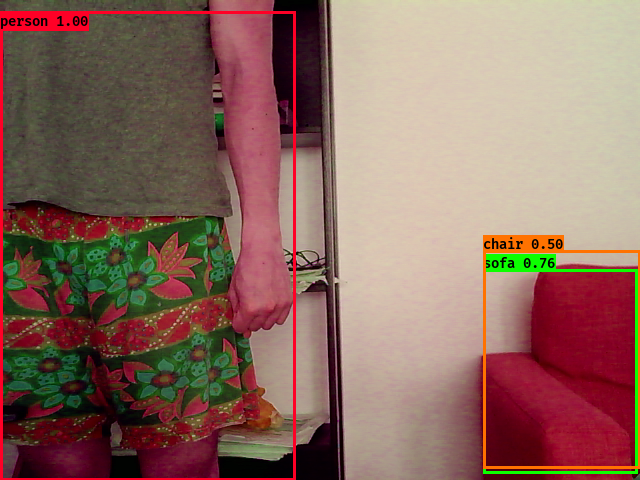

In [72]:
Image.fromarray(np.roll(img_arr, 1, axis=-1)) # we need to change the pos of a color since we store it form open cv so in brg